# Esercitazione 7
In questa esercitazione vogliamo simulare un insieme canonico in cui le particelle interagiscono tramite un potenziale di Lennard Jones. Il codice fornito calcola l'energia interna per particella $U/N$ e la pressione del sistema $P$. Sfruttiamo questi dati per delle analisi preliminari, dopdiché otterremo delle stime di queste grandezze, della funzione di densità radiale e delle loro incertezze nel sistema con delle medie a blocchi. Analizziamo tre fasi termodinamiche di un sistema di molecole di Argon ($\sigma = 0.34$ nm, $\epsilon/k_B = 120$ K, $m=39.948$ amu) caratterizzate dalle seguenti variabili di stato:
- fase solida: $\rho^\star = 1.1$, $T^\star = 0.8$
- fase liquida: $\rho^\star = 0.8$, $T^\star = 1.1$
- fase gassosa: $\rho^\star = 0.05$, $T^\star = 1.2$

dove $^\star$ indica che lavoriamo in unità di Lennard-Jones.

## Esercizio 07.1
All'inizio della simulazione bisogna attendere che il sistema sia equilibrato (consideriamo questo avvenuto dopo $n_{eq}=200$ passi). Un accorgimento per garantire efficienza computazionale e non eccessiva correlazione tra le configurazioni prodotte dall'algoritmo di Metropolis è impostare un valore di $\delta$ che garantisca un'accettazione media $\approx50\%$. Nelle nostre simulazioni abbiamo utilizzato i seguenti valori:
- fase solida: $\delta=0.12$
- fase liquida: $\delta=0.2$
- fase gassosa: $\delta=5.0$ (l'accettanza in questo caso è intorno al $60\%$, ma anche aumentando il valore di $\delta$ fino a comprendere tutto il volume di simulazione non si riesce ad ottenere un risultato migliore)

Dopo avere equilibrato i dati, possiamo studiarne l'autocorrelazione. Questa è una stima di quanto sono correlati tra loro due dati prodotti a $n$ step di simulazione uno dall'altro. La forma analitica di questa funzione è:
$$
AC_{[x]}(n)=\frac{\frac{1}{n_{max}-n}\sum_{n'=0}^{n_{max}-n}x(n')x(n'+n) - \frac{1}{n_{max}-n}\sum_{n'=0}^{n_{max}-n}x(n')\times\frac{1}{n_{max}-n}\sum_{n'=0}^{n_{max}-n}x(n'+n) }{\frac{1}{n_{max}}\sum_{n'=0}^{n_{max}}x^2(n')-\big(\frac{1}{n_{max}}\sum_{n'=0}^{n_{max}}x(n') \big)^2 }
$$
dove $n_{max}$ è il numero di dati prodotti e $x$ è la variabile di cui stiamo calcolando l'autocorrelazione. Ci aspettiamo per questa funzione un andamento esponenziale con un un tempo (o numero di passi) caratteristico $t_c$ ($AC_{[X]}(t)\approx \exp(-t/t_c)$): possiamo considerare completamente scorrelati valori a distanza $\gtrsim 2t_c$.

Abbiamo infine analizzato e graficato l'errore della stima finale di $U/N$ e $P$ in funzione della grandezza dei blocchi $M$ variabile in $[10,5000]$. Questo permette di osservare quando l'errore è relativamente stabile e quando invece il blocco è troppo piccolo e l'errore è sottostimato.

Per ciascuna fase riportiamo $5\times10^5$ dati grezzi di $U/N$ e $P$, un grafico della funzione di autocorrelazione per le due grandezze (con $n_{max}=5000)$ e uno dell'incertezza statistica sulla stima finale in funzione della dimensione dei blocchi in cui si suddividono i dati.

_il codice con cui abbiamo prodotto le immagini si trova in 'Esercizio7.1.ipynb'_

### Fase Solida

Dati ottenuti dalla simulazione:

![alt text](MonteCarlo_NVT/output/solid/solidraw.png "")

Funzione di autocorrelazione dei dati:

![alt_text](MonteCarlo_NVT/output/solid/ACsolid.png "")

Errore in funzione della dimensione dei blocchi:

![alt_text](MonteCarlo_NVT/output/solid/errsolid.png "")

### Fase Liquida

Dati ottenuti dalla simulazione:

![alt text](MonteCarlo_NVT/output/liquid/liquidraw.png "")

Funzione di autocorrelazione dei dati:

![alt_text](MonteCarlo_NVT/output/liquid/ACliquid.png "")

Errore in funzione della dimensione dei blocchi:

![alt_text](MonteCarlo_NVT/output/liquid/errliquid.png "")

### Fase Gassosa

Dati ottenuti dalla simulazione:

![alt text](MonteCarlo_NVT/output/gas/gasraw.png "")

Funzione di autocorrelazione dei dati:

![alt_text](MonteCarlo_NVT/output/gas/ACgas.png "")

Errore in funzione della dimensione dei blocchi:

![alt_text](MonteCarlo_NVT/output/gas/errgas.png "")

## Esercizio 07.2 - 07.3
In questa sezione ci siamo occupati di implementare l'algoritmo che permette di calcolare la funzione di distribuzione radiale $g(r)$, prima nel codice per la simulazione dell'insieme canonico e poi in quello già noto per l'insieme microcanonico. Abbiamo diviso l'intervallo $[0,L/2]$ (dove $L$ è la dimensione di un lato del volume cubico di simulazione) in $nbins=100$ intervalli, in modo da rappresentare la funzione con un istogramma. Il programma scorre tutte le coppie di particelle, e quando ne individua due a distanza compresa in $[r,r+dr]$ incrementa di due il contatore relativo a quell'intervallo. L'istogramma viene infine normalizzato dividendo il contenuto di tutti i bin per $\rho\Delta VN$, dove $\Delta V=\frac{4}{3}\pi((r+dr)^3-r^3)$. Anche in questo caso i dati sono raggruppati in blocchi: il programma produce in output un file con le medie di $g(r)$ per ogni bin e per ogni blocco e un file con le stime finali e le relative incertezze.

## Esercizio 07.4
Con gli strumenti sviluppati abbiamo simulato le fasi termodinamiche sopra descritte ed ottenuto stime per $U/N$ e $P$ nel sistema NVT, e per $g(r)$ nei sistemi NVT e NVE. Abbiamo utilizzato $5\times10^5$ passi MonteCarlo divisi in 100 blocchi per le simulazioni NVT, $10^5$ passi/$10^4$ misure per le simulazioni NVE (aumentati a $5\times10^5/5\times10^4$ nel caso del gas). Le misure NVE sono state divise in 50 blocchi. Riportiamo i risultati espressi in unità SI.

In [2]:
#conversione unità di misura

sigma = 3.4E-10
Escala=120.*1.381E-23
Pscala=Escala/(sigma**3)

### Fase solida
Funzione g(r): dati finali e confronto


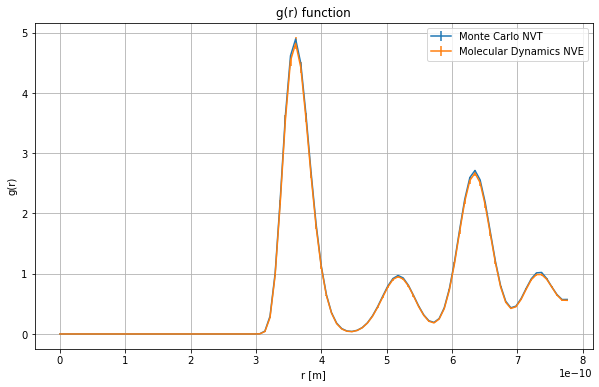

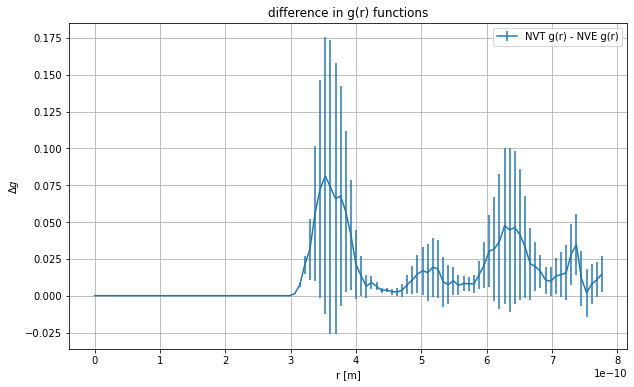

In [4]:
import matplotlib.pyplot as plt
import numpy as np

rNVT, gNVT, errNVT = np.loadtxt('MonteCarlo_NVT/output/solid/output.gave.0',usecols=(0,1,2),unpack=True)
rNVE, gNVE, errNVE = np.loadtxt('MolecularDynamics_NVE/outputs/solid/output.gave.0',usecols=(0,1,2),unpack=True)


plt.figure(figsize=(10,6))
plt.errorbar(rNVT*sigma,gNVT,errNVT,label='Monte Carlo NVT')
plt.errorbar(rNVE*sigma,gNVE,errNVE,label='Molecular Dynamics NVE')
plt.title('g(r) function')
plt.xlabel('r [m]')
plt.ylabel('g(r)')
plt.grid(True)
plt.legend()

mixedErr = np.sqrt(errNVE**2+errNVT**2)

plt.figure(figsize=(10,6))
plt.errorbar(rNVT*sigma,gNVT-gNVE,mixedErr,label='NVT g(r) - NVE g(r)')
plt.title('difference in g(r) functions')
plt.xlabel('r [m]')
plt.ylabel('$\Delta g$')
plt.grid(True)
plt.legend()

plt.show()

Pressione e Energia interna per particella:

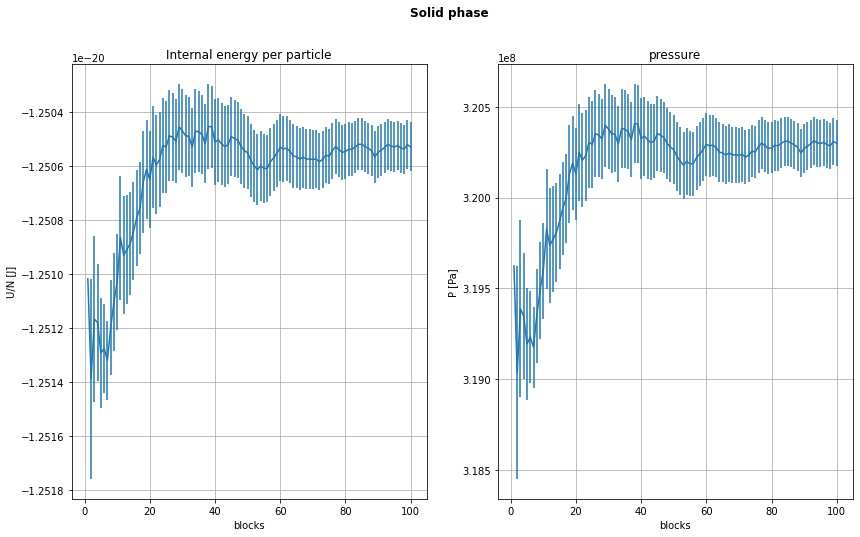

In [3]:
blocks, U, errU = Escala*np.loadtxt('MonteCarlo_NVT/output/solid/output.epot.0',unpack=True,usecols=(0,2,3))
P, errP = Pscala*np.loadtxt('MonteCarlo_NVT/output/solid/output.pres.0',unpack=True,usecols=(2,3))

blocks/=Escala

plt.figure(figsize=(14,8))
plt.suptitle('Solid phase',fontweight='bold')
plt.subplot(121)
plt.errorbar(blocks,U,errU)
plt.grid(True)
plt.xlabel('blocks')
plt.ylabel('U/N [J]')
plt.title('Internal energy per particle')

plt.subplot(122)
plt.errorbar(blocks,P,errP)
plt.grid(True)
plt.xlabel('blocks')
plt.ylabel('P [Pa]')
plt.title('pressure')

plt.show()

### Fase liquida
Funzione g(r): dati finali e confronto


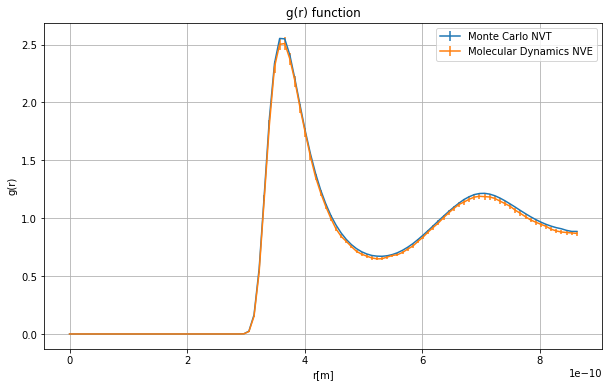

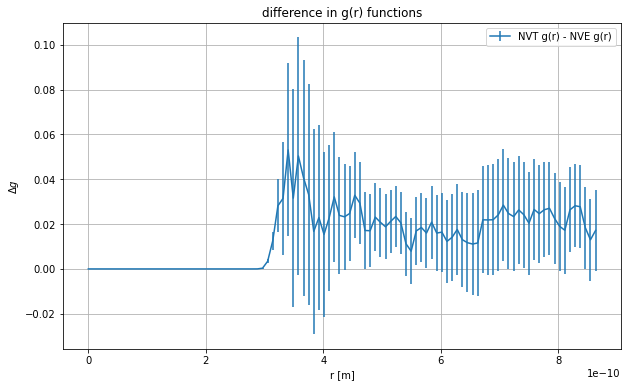

In [5]:
import matplotlib.pyplot as plt
import numpy as np

rNVT, gNVT, errNVT = np.loadtxt('MonteCarlo_NVT/output/liquid/output.gave.0',usecols=(0,1,2),unpack=True)
rNVE, gNVE, errNVE = np.loadtxt('MolecularDynamics_NVE/outputs/liquid/output.gave.0',usecols=(0,1,2),unpack=True)


plt.figure(figsize=(10,6))
plt.errorbar(sigma*rNVT,gNVT,errNVT,label='Monte Carlo NVT')
plt.errorbar(sigma*rNVE,gNVE,errNVE,label='Molecular Dynamics NVE')
plt.title('g(r) function')
plt.xlabel('r[m]')
plt.ylabel('g(r)')
plt.grid(True)
plt.legend()

mixedErr = np.sqrt(errNVE**2+errNVT**2)

plt.figure(figsize=(10,6))
plt.errorbar(sigma*rNVT,gNVT-gNVE,mixedErr,label='NVT g(r) - NVE g(r)')
plt.title('difference in g(r) functions')
plt.xlabel('r [m]')
plt.ylabel('$\Delta g$')
plt.grid(True)
plt.legend()

plt.show()


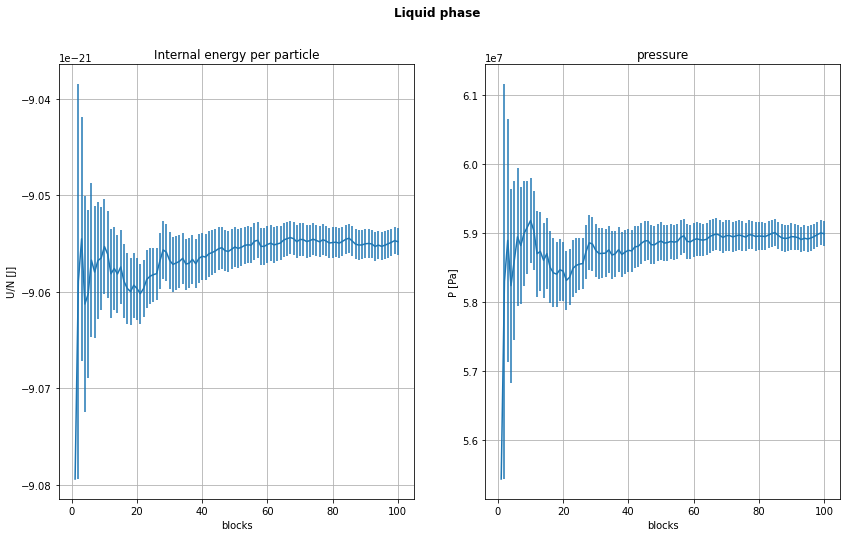

In [5]:
blocks, U, errU = Escala*np.loadtxt('MonteCarlo_NVT/output/liquid/output.epot.0',unpack=True,usecols=(0,2,3))
P, errP = Pscala*np.loadtxt('MonteCarlo_NVT/output/liquid/output.pres.0',unpack=True,usecols=(2,3))
blocks/=Escala

plt.figure(figsize=(14,8))
plt.suptitle('Liquid phase',fontweight='bold')
plt.subplot(121)
plt.errorbar(blocks,U,errU)
plt.grid(True)
plt.xlabel('blocks')
plt.ylabel('U/N [J]')
plt.title('Internal energy per particle')

plt.subplot(122)
plt.errorbar(blocks,P,errP)
plt.grid(True)
plt.xlabel('blocks')
plt.ylabel('P [Pa]')
plt.title('pressure')

plt.show()

### Fase gassosa
Funzione g(r): dati finali e confronto


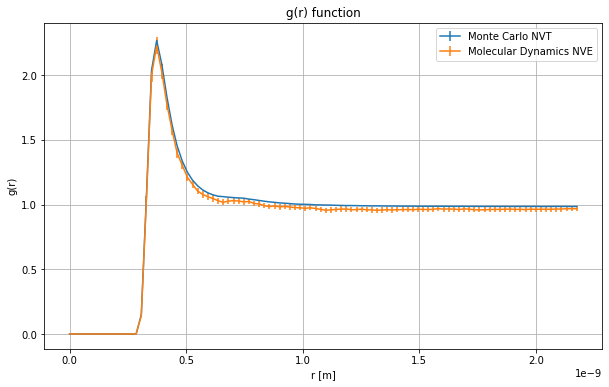

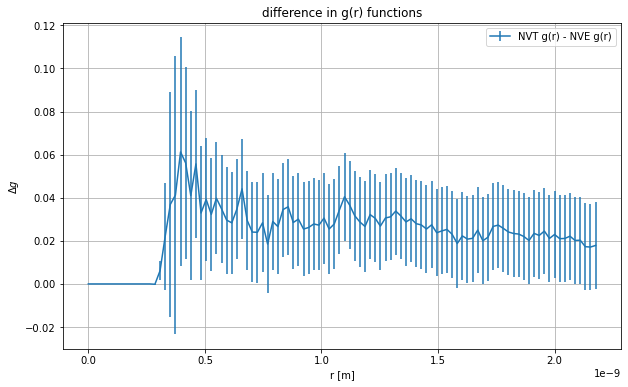

In [7]:
import matplotlib.pyplot as plt
import numpy as np

rNVT, gNVT, errNVT = np.loadtxt('MonteCarlo_NVT/output/gas/output.gave.0',usecols=(0,1,2),unpack=True)
rNVE, gNVE, errNVE = np.loadtxt('MolecularDynamics_NVE/outputs/gas/output.gave.0',usecols=(0,1,2),unpack=True)


plt.figure(figsize=(10,6))
plt.errorbar(sigma*rNVT,gNVT,errNVT,label='Monte Carlo NVT')
plt.errorbar(sigma*rNVE,gNVE,errNVE,label='Molecular Dynamics NVE')
plt.title('g(r) function')
plt.xlabel('r [m]')
plt.ylabel('g(r)')
plt.grid(True)
plt.legend()

mixedErr = np.sqrt(errNVE**2+errNVT**2)

plt.figure(figsize=(10,6))
plt.errorbar(sigma*rNVT,gNVT-gNVE,mixedErr,label='NVT g(r) - NVE g(r)')
plt.title('difference in g(r) functions')
plt.xlabel('r [m]')
plt.ylabel('$\Delta g$')
plt.grid(True)
plt.legend()

plt.show()


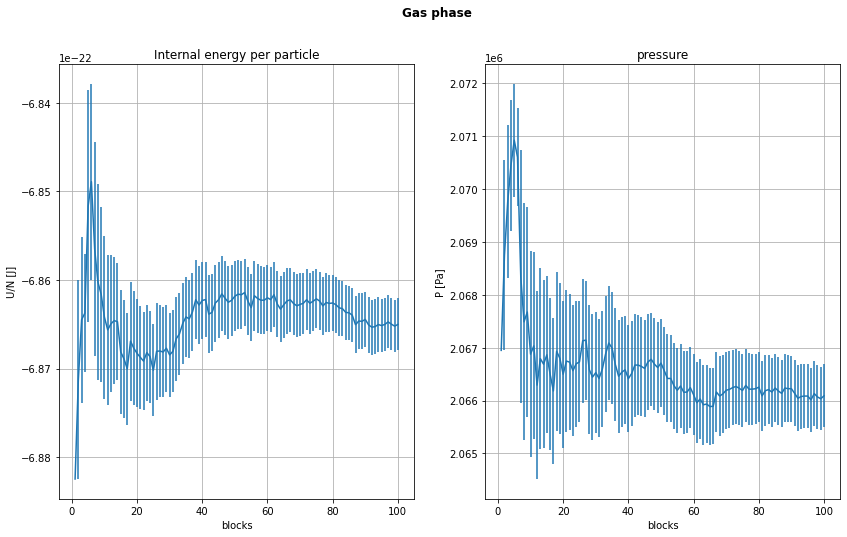

In [7]:
blocks, U, errU = Escala*np.loadtxt('MonteCarlo_NVT/output/gas/output.epot.0',unpack=True,usecols=(0,2,3))
P, errP = Pscala*np.loadtxt('MonteCarlo_NVT/output/gas/output.pres.0',unpack=True,usecols=(2,3))
blocks/=Escala

plt.figure(figsize=(14,8))
plt.suptitle('Gas phase',fontweight='bold')
plt.subplot(121)
plt.errorbar(blocks,U,errU)
plt.grid(True)
plt.xlabel('blocks')
plt.ylabel('U/N [J]')
plt.title('Internal energy per particle')

plt.subplot(122)
plt.errorbar(blocks,P,errP)
plt.grid(True)
plt.xlabel('blocks')
plt.ylabel('P [Pa]')
plt.title('pressure')

plt.show()